## Accuracy - Completnes - Validity - Timelines - Consistency - Uniqunes - Completnes

In [3]:
from pyspark.sql import SparkSession

spark = SparkSession.builder \
    .appName("DataExplorations") \
    .master("spark://spark-master:7077") \
    .getOrCreate()




    

In [4]:
df = spark.read.csv("hdfs://namenode:8020/data/telco/telco_churn.csv", header=True)

KeyboardInterrupt: 

In [43]:
from pyspark.sql.functions import *
from pyspark.sql.types import *

In [44]:
df.printSchema()

root
 |-- customerID: string (nullable = true)
 |-- gender: string (nullable = true)
 |-- SeniorCitizen: integer (nullable = true)
 |-- Partner: string (nullable = true)
 |-- Dependents: string (nullable = true)
 |-- tenure: integer (nullable = true)
 |-- PhoneService: string (nullable = true)
 |-- MultipleLines: string (nullable = true)
 |-- InternetService: string (nullable = true)
 |-- OnlineSecurity: string (nullable = true)
 |-- OnlineBackup: string (nullable = true)
 |-- DeviceProtection: string (nullable = true)
 |-- TechSupport: string (nullable = true)
 |-- StreamingTV: string (nullable = true)
 |-- StreamingMovies: string (nullable = true)
 |-- Contract: string (nullable = true)
 |-- PaperlessBilling: string (nullable = true)
 |-- PaymentMethod: string (nullable = true)
 |-- MonthlyCharges: double (nullable = true)
 |-- TotalCharges: string (nullable = true)
 |-- Churn: string (nullable = true)



In [45]:
df.show(4)

+----------+------+-------------+-------+----------+------+------------+----------------+---------------+--------------+------------+----------------+-----------+-----------+---------------+--------------+----------------+--------------------+--------------+------------+-----+
|customerID|gender|SeniorCitizen|Partner|Dependents|tenure|PhoneService|   MultipleLines|InternetService|OnlineSecurity|OnlineBackup|DeviceProtection|TechSupport|StreamingTV|StreamingMovies|      Contract|PaperlessBilling|       PaymentMethod|MonthlyCharges|TotalCharges|Churn|
+----------+------+-------------+-------+----------+------+------------+----------------+---------------+--------------+------------+----------------+-----------+-----------+---------------+--------------+----------------+--------------------+--------------+------------+-----+
|7590-VHVEG|Female|            0|    Yes|        No|     1|          No|No phone service|            DSL|            No|         Yes|              No|         No|    

In [46]:
df.select([count(when(col(c).isNull() | isnan(c), c)).alias(c) for c in df.columns]).show()

+----------+------+-------------+-------+----------+------+------------+-------------+---------------+--------------+------------+----------------+-----------+-----------+---------------+--------+----------------+-------------+--------------+------------+-----+
|customerID|gender|SeniorCitizen|Partner|Dependents|tenure|PhoneService|MultipleLines|InternetService|OnlineSecurity|OnlineBackup|DeviceProtection|TechSupport|StreamingTV|StreamingMovies|Contract|PaperlessBilling|PaymentMethod|MonthlyCharges|TotalCharges|Churn|
+----------+------+-------------+-------+----------+------+------------+-------------+---------------+--------------+------------+----------------+-----------+-----------+---------------+--------+----------------+-------------+--------------+------------+-----+
|         0|     0|            0|      0|         0|     0|           0|            0|              0|             0|           0|               0|          0|          0|              0|       0|               0| 

## No NULL Values

In [47]:
summary = df.describe()
summary.show()

+-------+----------+------+------------------+-------+----------+------------------+------------+-------------+---------------+--------------+------------+----------------+-----------+-----------+---------------+--------------+----------------+--------------------+------------------+------------------+-----+
|summary|customerID|gender|     SeniorCitizen|Partner|Dependents|            tenure|PhoneService|MultipleLines|InternetService|OnlineSecurity|OnlineBackup|DeviceProtection|TechSupport|StreamingTV|StreamingMovies|      Contract|PaperlessBilling|       PaymentMethod|    MonthlyCharges|      TotalCharges|Churn|
+-------+----------+------+------------------+-------+----------+------------------+------------+-------------+---------------+--------------+------------+----------------+-----------+-----------+---------------+--------------+----------------+--------------------+------------------+------------------+-----+
|  count|      7043|  7043|              7043|   7043|      7043|     

In [48]:
string_columns = [field.name for field in df.schema.fields if isinstance(field.dataType, StringType)]
df_string_only = df.select(string_columns)

In [49]:
for column in string_columns:
    print(f"Column: {column}")
    df.select(column).distinct().show()

Column: customerID
+----------+
|customerID|
+----------+
|3668-QPYBK|
|6234-RAAPL|
|1894-IGFSG|
|6982-SSHFK|
|5859-HZYLF|
|6479-OAUSD|
|2592-YKDIF|
|6718-BDGHG|
|3195-TQDZX|
|4248-QPAVC|
|5668-MEISB|
|5802-ADBRC|
|2712-SYWAY|
|2011-TRQYE|
|7244-KXYZN|
|0953-LGOVU|
|3623-FQBOX|
|3692-JHONH|
|3528-HFRIQ|
|7661-CPURM|
+----------+
only showing top 20 rows

Column: gender
+------+
|gender|
+------+
|Female|
|  Male|
+------+

Column: Partner
+-------+
|Partner|
+-------+
|     No|
|    Yes|
+-------+

Column: Dependents
+----------+
|Dependents|
+----------+
|        No|
|       Yes|
+----------+

Column: PhoneService
+------------+
|PhoneService|
+------------+
|          No|
|         Yes|
+------------+

Column: MultipleLines
+----------------+
|   MultipleLines|
+----------------+
|No phone service|
|              No|
|             Yes|
+----------------+

Column: InternetService
+---------------+
|InternetService|
+---------------+
|    Fiber optic|
|             No|
|            DSL

## Uniquness ✅

In [50]:
df = df.withColumn("TotalCharges", col("TotalCharges").cast("double"))

In [51]:
df.printSchema()

root
 |-- customerID: string (nullable = true)
 |-- gender: string (nullable = true)
 |-- SeniorCitizen: integer (nullable = true)
 |-- Partner: string (nullable = true)
 |-- Dependents: string (nullable = true)
 |-- tenure: integer (nullable = true)
 |-- PhoneService: string (nullable = true)
 |-- MultipleLines: string (nullable = true)
 |-- InternetService: string (nullable = true)
 |-- OnlineSecurity: string (nullable = true)
 |-- OnlineBackup: string (nullable = true)
 |-- DeviceProtection: string (nullable = true)
 |-- TechSupport: string (nullable = true)
 |-- StreamingTV: string (nullable = true)
 |-- StreamingMovies: string (nullable = true)
 |-- Contract: string (nullable = true)
 |-- PaperlessBilling: string (nullable = true)
 |-- PaymentMethod: string (nullable = true)
 |-- MonthlyCharges: double (nullable = true)
 |-- TotalCharges: double (nullable = true)
 |-- Churn: string (nullable = true)



## Validity ✅

In [52]:
df.distinct().count()

7043

In [53]:
df.count()

7043

## Uniquness ✅ 

In [54]:
MCS = df.select("MonthlyCharges" ).sample(False , 0.1 , seed=42).toPandas()

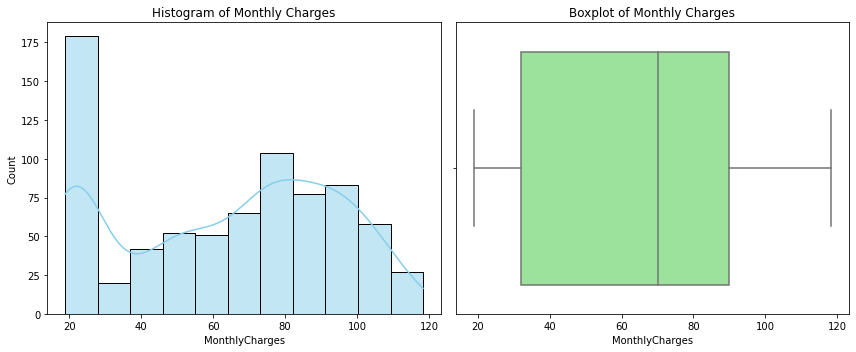

In [55]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))

plt.subplot(1, 2, 1)
sns.histplot(data=MCS, x="MonthlyCharges", kde=True, color="skyblue")
plt.title("Histogram of Monthly Charges")

plt.subplot(1, 2, 2)
sns.boxplot(data=MCS, x="MonthlyCharges", color="lightgreen")
plt.title("Boxplot of Monthly Charges")

plt.tight_layout()
plt.show()

In [56]:
TCS = df.select("TotalCharges" ).sample(False , 0.1 , seed=42).toPandas()

<AxesSubplot:xlabel='TotalCharges'>

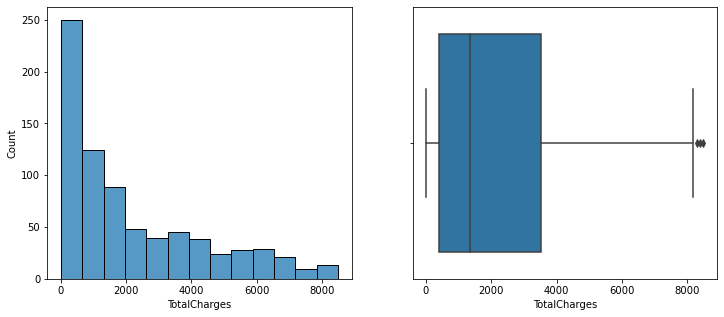

In [57]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(x="TotalCharges", data=TCS)

plt.subplot(1, 2, 2)
sns.boxplot(x="TotalCharges", data=TCS)

In [58]:
churn = df.select("Churn").sample(False, 0.1, seed=42).toPandas()

In [59]:
churn['Churn'].value_counts()

No     565
Yes    193
Name: Churn, dtype: int64

<AxesSubplot:xlabel='Churn', ylabel='count'>

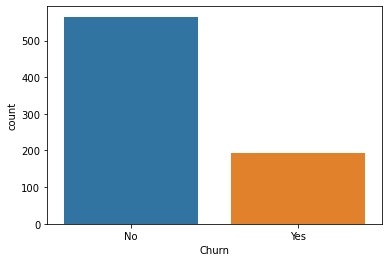

In [60]:
sns.countplot(data=churn, x="Churn")

## 📌 Imbalanced Dataset

In [61]:
df.show(5)

+----------+------+-------------+-------+----------+------+------------+----------------+---------------+--------------+------------+----------------+-----------+-----------+---------------+--------------+----------------+--------------------+--------------+------------+-----+
|customerID|gender|SeniorCitizen|Partner|Dependents|tenure|PhoneService|   MultipleLines|InternetService|OnlineSecurity|OnlineBackup|DeviceProtection|TechSupport|StreamingTV|StreamingMovies|      Contract|PaperlessBilling|       PaymentMethod|MonthlyCharges|TotalCharges|Churn|
+----------+------+-------------+-------+----------+------+------------+----------------+---------------+--------------+------------+----------------+-----------+-----------+---------------+--------------+----------------+--------------------+--------------+------------+-----+
|7590-VHVEG|Female|            0|    Yes|        No|     1|          No|No phone service|            DSL|            No|         Yes|              No|         No|    

In [62]:
df_pandas = df.toPandas()

In [63]:
df_pandas.isna().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [64]:
df.filter(col("TotalCharges").isNull()).show()

+----------+------+-------------+-------+----------+------+------------+----------------+---------------+-------------------+-------------------+-------------------+-------------------+-------------------+-------------------+--------+----------------+--------------------+--------------+------------+-----+
|customerID|gender|SeniorCitizen|Partner|Dependents|tenure|PhoneService|   MultipleLines|InternetService|     OnlineSecurity|       OnlineBackup|   DeviceProtection|        TechSupport|        StreamingTV|    StreamingMovies|Contract|PaperlessBilling|       PaymentMethod|MonthlyCharges|TotalCharges|Churn|
+----------+------+-------------+-------+----------+------+------------+----------------+---------------+-------------------+-------------------+-------------------+-------------------+-------------------+-------------------+--------+----------------+--------------------+--------------+------------+-----+
|4472-LVYGI|Female|            0|    Yes|       Yes|     0|          No|No phon

## 📌 The missing value of `TotalCharges` is when `the tenure = 0` which means these customers have just joined and haven't been charged yet

In [67]:
df = df.withColumn("TotalCharges", when(col("TotalCharges").isNull(), 0).otherwise(col("TotalCharges")))

## impute the missing values with 0 ✅

In [70]:
for colname in df.columns:
    df = df.withColumnRenamed(colname, colname.strip().lower().replace(" ", "_"))


In [72]:
df.printSchema()

root
 |-- customerid: string (nullable = true)
 |-- gender: string (nullable = true)
 |-- seniorcitizen: integer (nullable = true)
 |-- partner: string (nullable = true)
 |-- dependents: string (nullable = true)
 |-- tenure: integer (nullable = true)
 |-- phoneservice: string (nullable = true)
 |-- multiplelines: string (nullable = true)
 |-- internetservice: string (nullable = true)
 |-- onlinesecurity: string (nullable = true)
 |-- onlinebackup: string (nullable = true)
 |-- deviceprotection: string (nullable = true)
 |-- techsupport: string (nullable = true)
 |-- streamingtv: string (nullable = true)
 |-- streamingmovies: string (nullable = true)
 |-- contract: string (nullable = true)
 |-- paperlessbilling: string (nullable = true)
 |-- paymentmethod: string (nullable = true)
 |-- monthlycharges: double (nullable = true)
 |-- totalcharges: double (nullable = true)
 |-- churn: string (nullable = true)



In [74]:
df = df.withColumn("seniorcitizen", when(col("seniorcitizen") == 1 , "Yes").otherwise("No"))